In [1]:
%cd ..

/Users/cedoz/Documents/Stanford/CS224W/Network-Analysis-of-Human-Protein-Interaction-Network


In [4]:
from read_graph import read_graph

In [6]:
%time PPI_Graph,dic_names = read_graph(directed=False)

 47%|████▋     | 9149/19576 [00:00<00:00, 91407.71it/s]

Reading Nodes list


100%|██████████| 19576/19576 [00:00<00:00, 94167.44it/s]


Reading Edges list
CPU times: user 1min 20s, sys: 3.4 s, total: 1min 23s
Wall time: 1min 23s


In [ ]:
PPI_Graph.

In [7]:
import networkx as nx

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib notebook

## Basic properties (Directed)

In [4]:
print("Number of Nodes {}\nNumber of edges {}".format(PPI_Graph.number_of_nodes(),PPI_Graph.number_of_edges()))

Number of Nodes 19576
Number of edges 5676528


In [5]:
in_degrees = list()
nodes = list()
out_degrees = list()

for node in PPI_Graph:
    in_degrees.append(PPI_Graph.in_degree(node))
    out_degrees.append(PPI_Graph.out_degree(node))

AttributeError: 'Graph' object has no attribute 'in_degree'

In [13]:
out_degree, out_counts = np.unique(out_degrees,return_counts=True)
in_degree, in_counts = np.unique(in_degrees,return_counts=True)

<IPython.core.display.Javascript object>


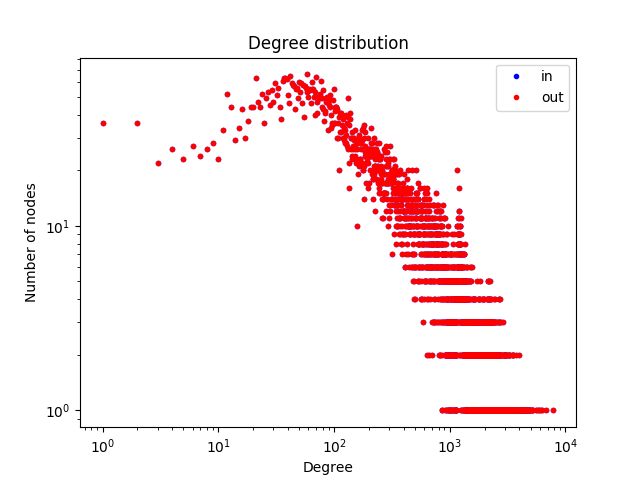

In [14]:
plt.loglog(in_degree,in_counts,'.b',label = 'in')
plt.loglog(out_degree,out_counts,'.r',label = 'out')
plt.title("Degree distribution")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.legend()

In [15]:
degrees_rounded, counts_rounded = np.unique([10*int(x/10.0) for x in in_degrees],return_counts=True)

<IPython.core.display.Javascript object>


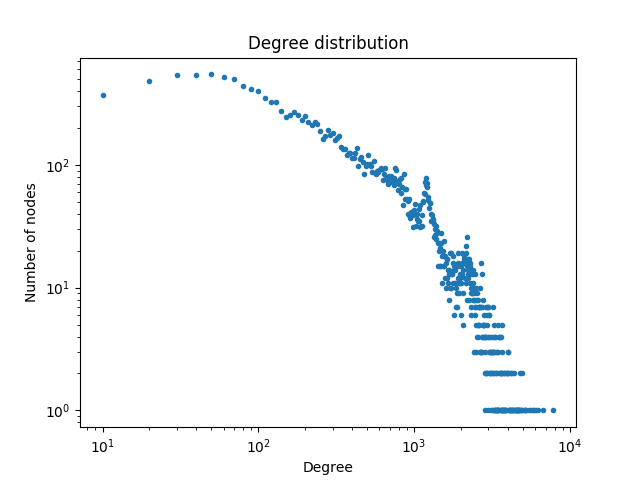

Text(0,0.5,'Number of nodes')

In [16]:
plt.loglog(degrees_rounded,counts_rounded,'.')
plt.title("Degree distribution")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")

In [17]:
any(x!=y for x,y in zip(in_degrees,out_degrees))

False

This could be approximated by a piecewise power law

## Basic properties (Undirected)

In [9]:
degrees = list()

for node in PPI_Graph:
    degrees.append(PPI_Graph.degree(node))
degree,counts = np.unique(degrees,return_counts = True)

<IPython.core.display.Javascript object>


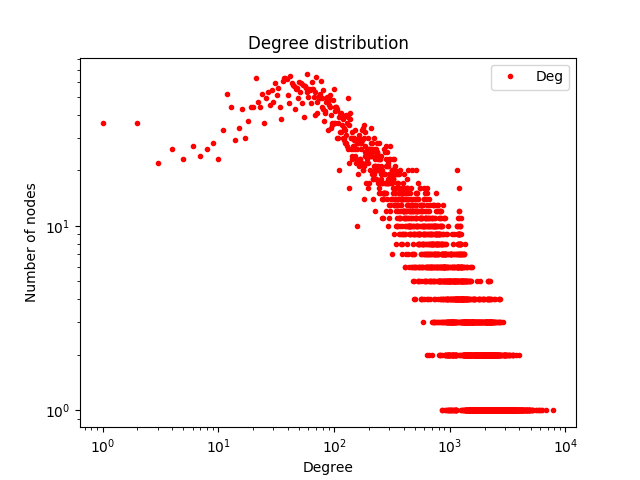

In [10]:
plt.loglog(degree,counts,'.r',label = 'Deg')
plt.title("Degree distribution")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.legend()

In [14]:
%time clustering_coeffs = nx.algorithms.clustering(PPI_Graph)

KeyboardInterrupt: 

In [21]:
from tqdm import tqdm
from random import choice

array([  459,  8179, 10981,  7021, 12555,  5927,  4755,  9409, 11673, 11711])

In [25]:
def compute_sampled_clustering(Graph,n_samples):
    nodelist = np.random.choice(Graph,replace=False,size = n_samples)
    clust_coeffs = list()
    nodes = list()
    for node in tqdm(nodelist):
        nodes.append(node)
        clust_coeffs.append(nx.algorithms.clustering(Graph,node))
    return clust_coeffs,nodes

In [32]:
clust_coefs,nodesl = compute_sampled_clustering(PPI_Graph,5000)

100%|██████████| 5000/5000 [10:01<00:00,  8.32it/s]


<IPython.core.display.Javascript object>


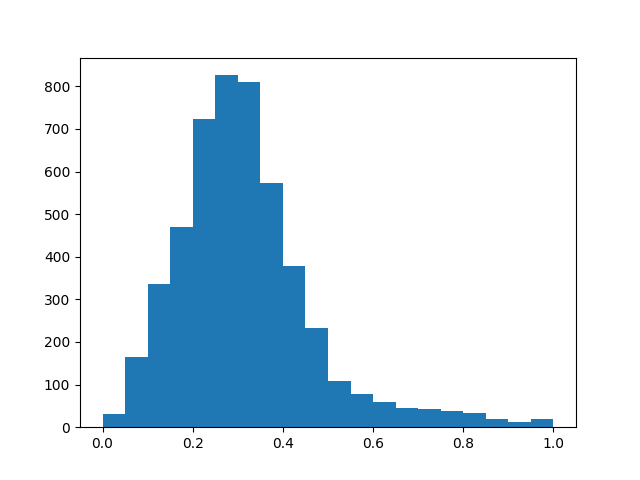

(array([  31.,  165.,  335.,  469.,  723.,  826.,  811.,  574.,  378.,
         232.,  108.,   78.,   58.,   46.,   43.,   37.,   34.,   20.,
          13.,   19.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

In [33]:
plt.hist(clust_coefs,bins =20)

In [34]:
%time pr_list = nx.algorithms.pagerank(PPI_Graph)

CPU times: user 3min 47s, sys: 2.58 s, total: 3min 49s
Wall time: 3min 49s


In [37]:
pr_lst,nodes_pr = list(),list()
for x,y in pr_list.items():
    pr_lst.append(y)
    nodes_pr.append(x)

<IPython.core.display.Javascript object>


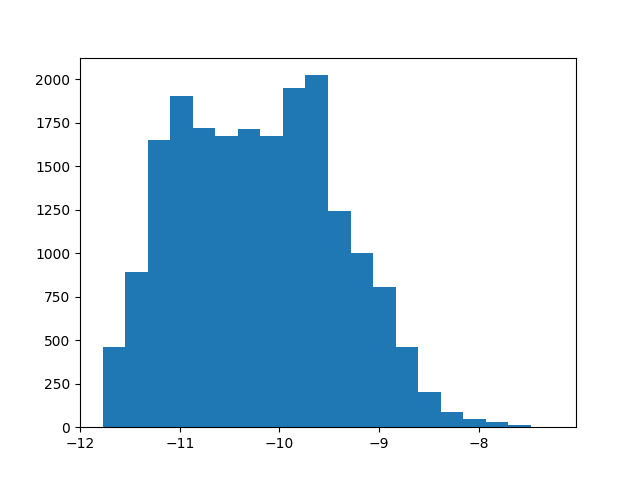

(array([  460.,   894.,  1652.,  1906.,  1721.,  1675.,  1715.,  1673.,
         1952.,  2024.,  1246.,  1000.,   806.,   464.,   205.,    86.,
           50.,    31.,    12.,     4.]),
 array([-11.77427131, -11.54813867, -11.32200602, -11.09587337,
        -10.86974072, -10.64360807, -10.41747542, -10.19134277,
         -9.96521012,  -9.73907747,  -9.51294482,  -9.28681217,
         -9.06067952,  -8.83454687,  -8.60841422,  -8.38228157,
         -8.15614892,  -7.93001627,  -7.70388363,  -7.47775098,  -7.25161833]),
 <a list of 20 Patch objects>)

In [39]:
plt.hist(np.log(pr_lst),bins =20)